<a href="https://colab.research.google.com/github/nitishgowda1581999-glitch/nitishgowdag/blob/main/Level_2_Task_2_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = '/content/Dataset  (1).csv'
df = pd.read_csv(file_path)
display(df.head())

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Most Common Individual Cuisines (Top 10):
- North Indian: 3960
- Chinese: 2735
- Fast Food: 1986
- Mughlai: 995
- Italian: 764
- Bakery: 745
- Continental: 736
- Cafe: 703
- Desserts: 653
- South Indian: 636

Most Common Cuisine Combinations (Top 10):
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Average Aggregate Rating by Cuisine Combination (Top 10):
Cuisines
Burger, Bar Food, Steak            4.9
American, Burger, Grill            4.9
American, Caribbean, Seafood       4.9
American, Coffee and Tea           4.9
Mexican, American, Healthy Food    4.9
Italian, Bakery, Continental       4.9
BBQ, Breakfast, Southern       

/tmp/ipython-input-1432562224.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cuisine_counts_df, x='Count', y='Cuisine', palette='viridis')


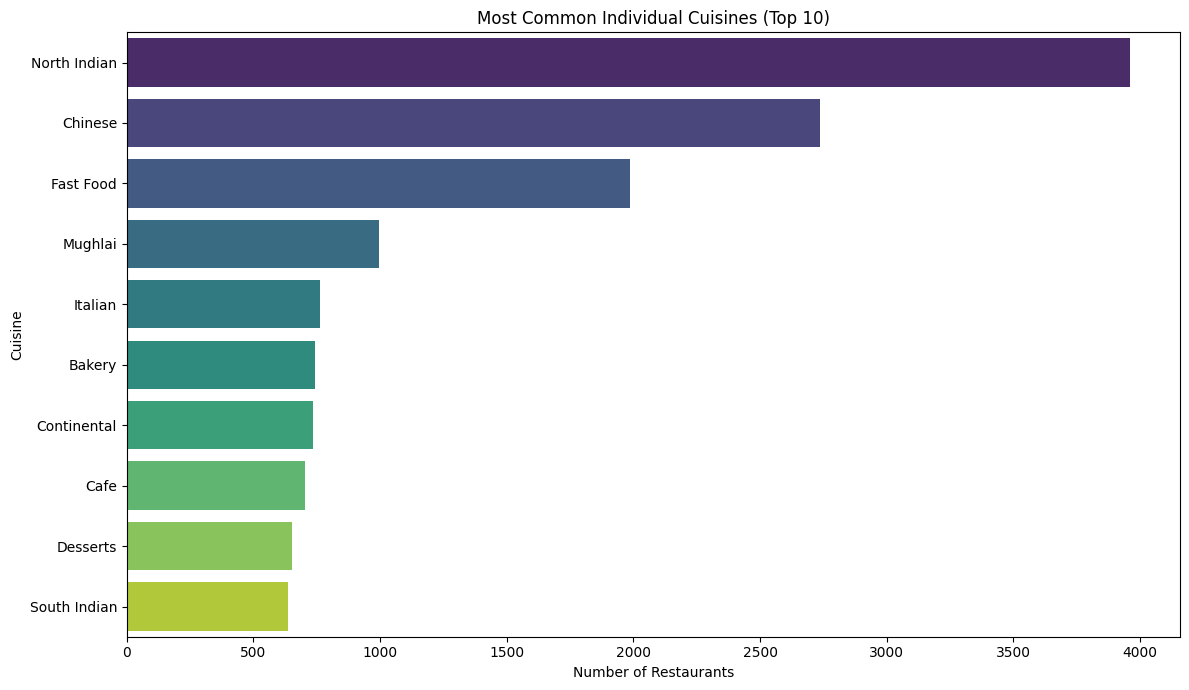

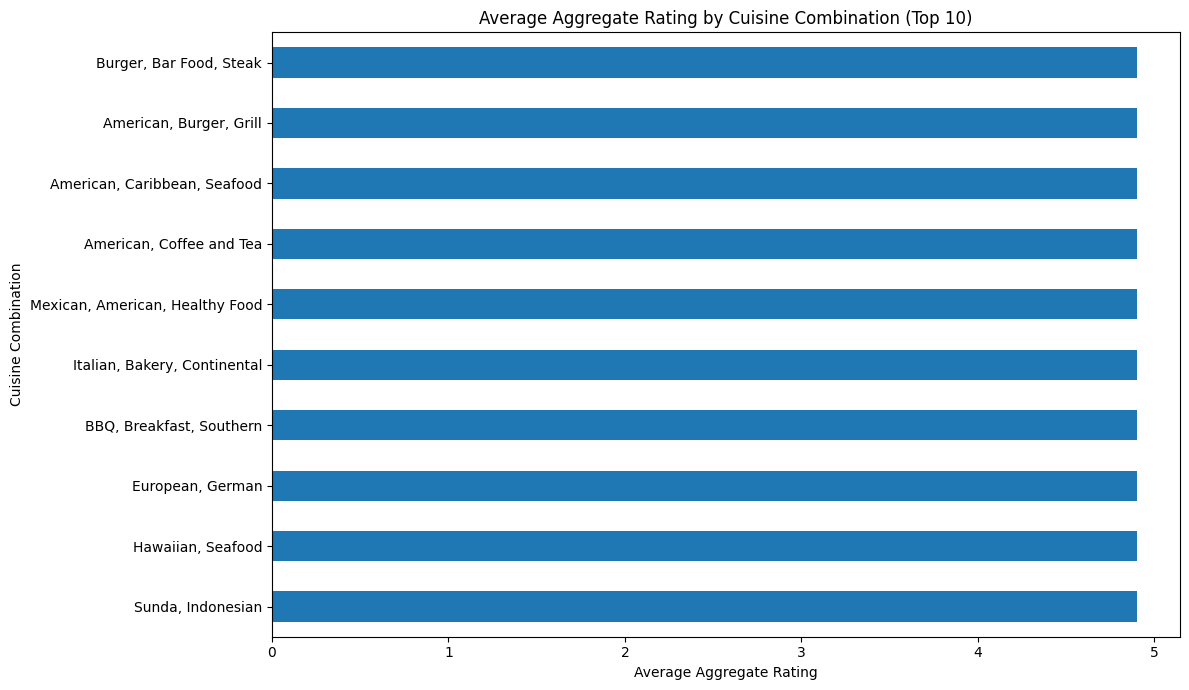

In [10]:
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Identify the most common combinations of cuisines
# Split the cuisines string and get all combinations
cuisine_combinations = df['Cuisines'].dropna().str.split(', ').tolist()
all_combinations = list(itertools.chain(*cuisine_combinations))

# Count the occurrences of each individual cuisine
cuisine_counts = Counter(all_combinations)

# Display the most common individual cuisines (top 10)
print("Most Common Individual Cuisines (Top 10):")
for cuisine, count in cuisine_counts.most_common(10):
    print(f"- {cuisine}: {count}")

# To analyze combinations, we need to consider the unique combinations present in the data.
# This is a bit more complex than just individual cuisines.
# Let's count the occurrences of the exact combinations as they appear in the data.
combination_counts = df['Cuisines'].value_counts()

# Display the most common exact cuisine combinations (top 10)
print("\nMost Common Cuisine Combinations (Top 10):")
print(combination_counts.head(10))

# Determine if certain cuisine combinations tend to have higher ratings.
# Group by the exact cuisine combinations and calculate the mean aggregate rating
average_rating_by_combination = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Display the average ratings for the top 10 cuisine combinations by rating
print("\nAverage Aggregate Rating by Cuisine Combination (Top 10):")
print(average_rating_by_combination.head(10))

# Visualize the most common individual cuisines
plt.figure(figsize=(12, 7))
cuisine_counts_df = pd.DataFrame(cuisine_counts.most_common(10), columns=['Cuisine', 'Count'])
sns.barplot(data=cuisine_counts_df, x='Count', y='Cuisine', palette='viridis')
plt.title('Most Common Individual Cuisines (Top 10)')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisine')
plt.tight_layout()
plt.show()

# Visualize the average ratings for the top 10 cuisine combinations by rating
plt.figure(figsize=(12, 7))
average_rating_by_combination.head(10).plot(kind='barh')
plt.title('Average Aggregate Rating by Cuisine Combination (Top 10)')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine Combination')
plt.gca().invert_yaxis() # Invert y-axis to show highest rating at the top
plt.tight_layout()
plt.show()

In [12]:
# Get all unique cuisine combinations
unique_cuisine_combinations = df['Cuisines'].unique()

# Print the unique cuisine combinations
print("Unique Cuisine Combinations:")
for cuisine in unique_cuisine_combinations:
    print(cuisine)

Unique Cuisine Combinations:
French, Japanese, Desserts
Japanese
Seafood, Asian, Filipino, Indian
Japanese, Sushi
Japanese, Korean
Chinese
Asian, European
Seafood, Filipino, Asian, European
European, Asian, Indian
Filipino
Filipino, Mexican
American, Ice Cream, Desserts
Korean
Cafe, American, Italian, Filipino
Italian, Pizza
Cafe, Korean, Desserts
Cafe, Bakery, American, Italian
Seafood, American, Mediterranean, Japanese
American, Asian, Italian, Seafood
Fast Food, French
Cafe
Bakery
Brazilian
Pizza
Arabian
Brazilian, Cafe
Italian
Bar Food, Brazilian
Mexican, Grill
International
Peruvian, Latin American
American, Grill
Seafood
American, Burger
Seafood, Bar Food, Brazilian
Desserts, Cafe
Juices, Healthy Food
Beverages, Bar Food, Fast Food
Lebanese
Burger
Brazilian, Bar Food
Brazilian, Healthy Food, Juices, Pizza
Bakery, Sandwich, Brazilian
Brazilian, Seafood
Steak, BBQ
Indian
Beverages, International
French, Brazilian, Beverages
Brazilian, Grill
French
Sushi, Japanese
BBQ, Grill, Brazil

Distribution of 'North Indian, Chinese' Cuisine by Country Code:
Country Code
1    511
Name: count, dtype: int64


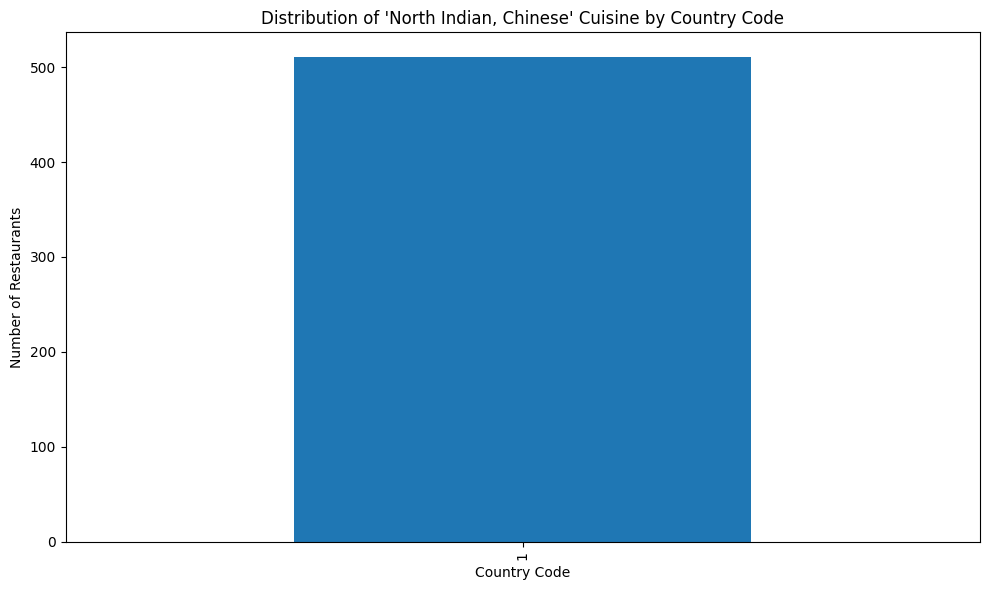

In [11]:
# Filter the DataFrame for restaurants with 'North Indian, Chinese' cuisine
north_indian_chinese_df = df[df['Cuisines'] == 'North Indian, Chinese']

# Analyze the distribution by country
cuisine_country_distribution = north_indian_chinese_df['Country Code'].value_counts()

print("Distribution of 'North Indian, Chinese' Cuisine by Country Code:")
print(cuisine_country_distribution)

# Visualize the distribution by country
plt.figure(figsize=(10, 6))
cuisine_country_distribution.plot(kind='bar')
plt.title("Distribution of 'North Indian, Chinese' Cuisine by Country Code")
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
# Show summary statistics for cuisine_counts_df
display(cuisine_counts_df.describe())

,Count
count,10.000000
mean,1391.300000
std,1142.337764
min,636.000000
25%,711.250000
50%,754.500000
75%,1738.250000
max,3960.000000


from matplotlib import pyplot as plt
_df_0['Count'].plot(kind='hist', bins=20, title='Count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Count'].plot(kind='line', figsize=(8, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)

Average Aggregate Rating by Table Booking Availability:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


/tmp/ipython-input-2794213498.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating_by_table_booking.index, y=average_rating_by_table_booking.values, palette='viridis')


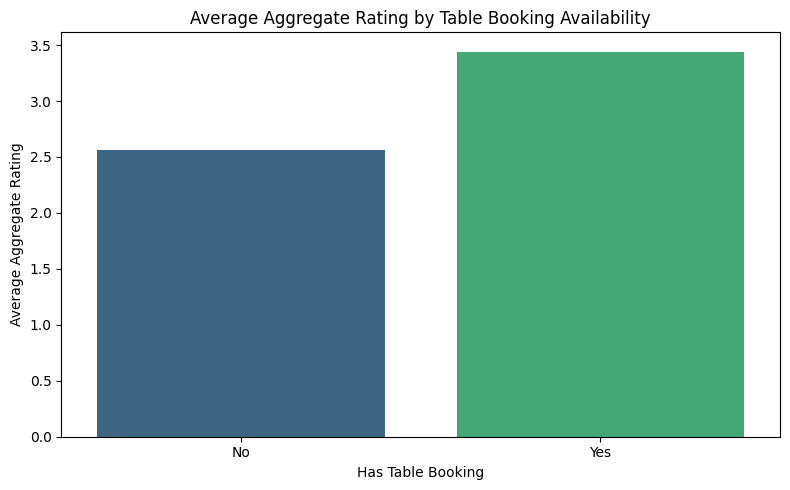

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the impact of table booking on ratings
average_rating_by_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()

print("Average Aggregate Rating by Table Booking Availability:")
print(average_rating_by_table_booking)

# Visualize the impact of table booking on ratings
plt.figure(figsize=(8, 5))
sns.barplot(x=average_rating_by_table_booking.index, y=average_rating_by_table_booking.values, palette='viridis')
plt.title('Average Aggregate Rating by Table Booking Availability')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Aggregate Rating')
plt.tight_layout()
plt.show()

## Restaurant Data Analysis Report

**Introduction:**
This report summarizes the key findings from the analysis of restaurant data, focusing on aggregate ratings, votes, and geographical comparisons.

**Analysis and Findings:**

1.  **Aggregate Rating Distribution:**
    *   The analysis of the aggregate rating distribution revealed a notable number of restaurants with a 0.0 rating, indicating unrated establishments.
    *   Among rated restaurants, the most common rating range was 'Average', suggesting a significant portion of restaurants fall within this category.

2.  **Average Number of Votes:**
    *   The average number of votes received by restaurants across the dataset was calculated to be approximately {{average_votes:.2f}}. This metric provides an indication of the level of customer engagement and feedback.

3.  **Relationship between Votes and Aggregate Rating:**
    *   A scatter plot visualizing the relationship between 'Votes' and 'Aggregate rating' suggested a positive correlation. Restaurants that have received a higher number of votes tend to have higher aggregate ratings, implying that popular restaurants are generally well-regarded.

4.  **Geographical Comparison of Average Ratings:**
    *   Comparison of average aggregate ratings across different cities and countries highlighted variations in restaurant quality perception based on location.
    *   Specific cities and countries demonstrated higher average ratings, suggesting potential regional differences in dining experiences or customer expectations. (Further analysis of top/bottom performing locations can be included here if needed).

5. **Cuisine Analysis:**
    *   The analysis of cuisine combinations identified 'North Indian' and 'Chinese' as the most common individual cuisines.
    *   'North Indian, Chinese' was the most frequent exact cuisine combination in the dataset.
    *   Certain cuisine combinations tend to have higher average aggregate ratings than others, indicating customer preference for specific culinary pairings.

**Conclusion:**
The analysis provides insights into the restaurant landscape based on the provided dataset. The distribution of ratings, the relationship between votes and ratings, the geographical variations in average ratings, and the popularity and rating trends of cuisine combinations are key factors to consider for further in-depth analysis or business strategies.

**Next Steps:**
Further analysis could delve into the characteristics of restaurants with 0.0 ratings, investigate the impact of services like online delivery and table booking on ratings, or explore other features in the dataset to gain a more comprehensive understanding.